In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from IPython import display

# H1B_Visa_Analysis

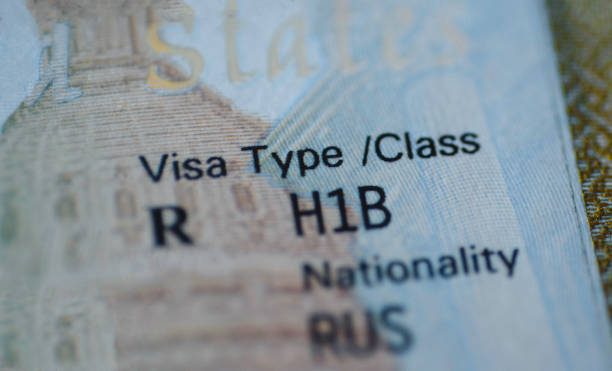

In [2]:
display.Image("/kaggle/input/h1b-dataset/h1b.jpg")

### What is H1B Visa?
1. The H-1B is a visa in the United States under the Immigration and Nationality Act, section 101(a)(15)(H) that allows U.S. employers to employ foreign workers in specialty occupations.
2. A specialty occupation requires the application of specialized knowledge and a bachelor's degree or the equivalent of work experience.
3. The duration of stay is three years, extendable to six years, after which the visa holder may need to reapply.
4. Laws limit the number of H-1B visas that are issued each year: 206,002 new and initial H-1B visas were issued in 2022.
5. Employers must generally withhold Social Security and Medicare taxes from the wages paid to employees in H-1B status.

### Quick Facts about H1B Visa Lottery
1. The Immigration Act of 1990 established a limit of 65,000 foreign nationals who may be issued a visa each fiscal year.
2. An additional 20,000 H-1Bs are available to foreign nationals holding a master's or higher degree from U.S. universities.
3. In addition, excluded from the ceiling are all H-1B non-immigrants who work at universities, non-profit research facilities associated with universities, and government research facilities.
4. Person in H-1B status must continue to be employed by their employer in order to stay in H-1B status. If the person's employment ends for any reason, the person must leave the United States, unless the person is granted a change of status or finds another employer compatible with the H-1B status.
5. The United States Citizenship and Immigration Services allows grace period of up to 60 days to stay in the United States after the person's end of employment.

### Data Source
- This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall.
- The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

# Purpose of the Analysis:

1. How the number of visa applications are growing over the years.
2. Companies offering H1B sponsorships.
3. Key roles that are being offered Sponsorships.
4. Salary distribution for the roles being offered.
5. How the Data related roles look like.

In [3]:
h1b_df=pd.read_csv("/kaggle/input/h1b-dataset/h1b_kaggle.csv")

In [4]:
def convert_short(x):
    if x=="TATA CONSULTANCY SERVICES LIMITED":
        return "TCS"
    elif x=="DELOITTE CONSULTING LLP":
        return "DELOITTE"
    elif x=="IBM INDIA PRIVATE LIMITED":
        return "IBM LIMITED"
    elif x=="COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION":
        return "COGNIZANT SOLUTIONS"
    else:
        return x

In [5]:
h1b_df["EMPLOYER_NAME"]=h1b_df["EMPLOYER_NAME"].apply(convert_short)

# Visa Applications over years

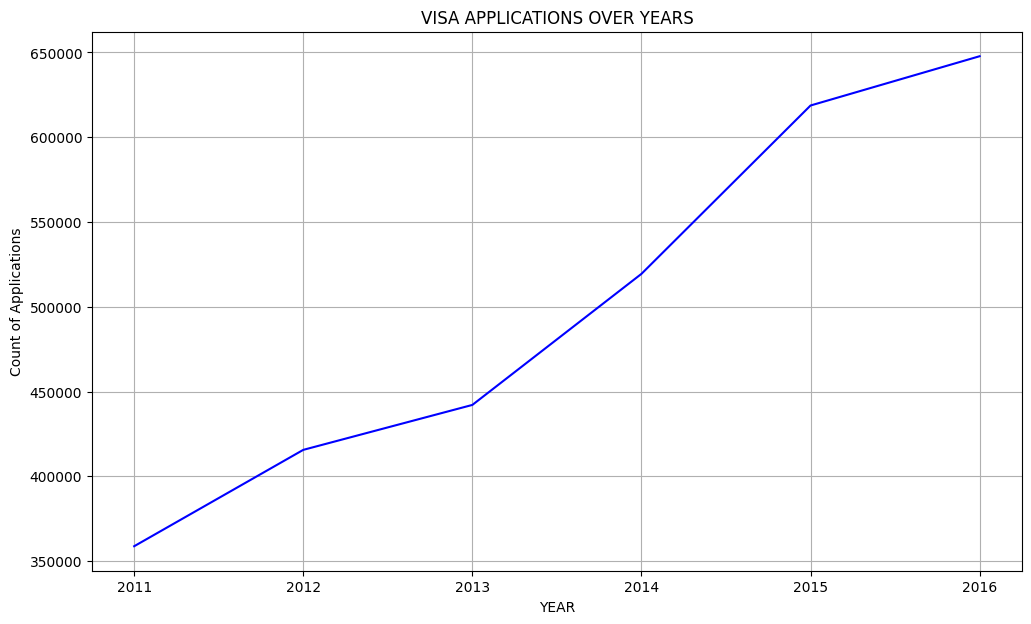

In [6]:
applications_over_years=h1b_df.groupby("YEAR")["EMPLOYER_NAME"].count()
plt.figure(figsize=(12,7))
applications_over_years.plot(kind="line",color="blue",xlabel="YEAR",ylabel="Count of Applications")
plt.title("VISA APPLICATIONS OVER YEARS")
plt.grid()
plt.show()

### Findings:
- No of applications have almost tripled from 2011 to 2016.
- There has been a steady or almost exponential increase in the number of applications over the years, While the number of slots available per year stayed constant at 65000 slots.
- To put it in a probabilistic manner, as the number of applications increasing exponentially your probability of being picked up is reducing dramatically.

### Chances of Picking

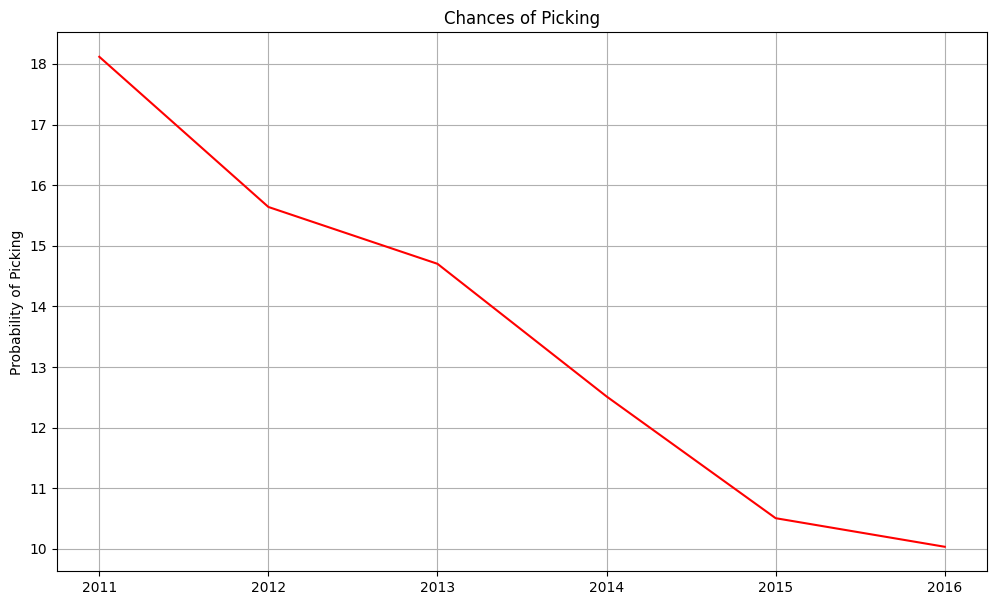

In [7]:
totals_per_year=h1b_df.groupby("YEAR")["CASE_STATUS"].count().values
years=[i for i in range(2011,2017)]
chances=(65000/np.array(totals_per_year))*100
plt.figure(figsize=(12,7))
plt.plot(years,chances,color="red")
plt.title("Chances of Picking")
plt.ylabel("Probability of Picking")
plt.grid()
plt.show()

### Findings:
- If you have applied for a H1B Visa in 2011, Your chances of being picked is at approximately 18%.
- Whereas 5 years down the line, your probability has dropped down to 10%.
- However there can be external factors involved in deciding your chances(Such as applying more than one H1B applications per applicant) which increases your probability.
- But to put it in the clean perspective as the number of applications are growing, your chance at the table is goind down.

### Case Status per Year

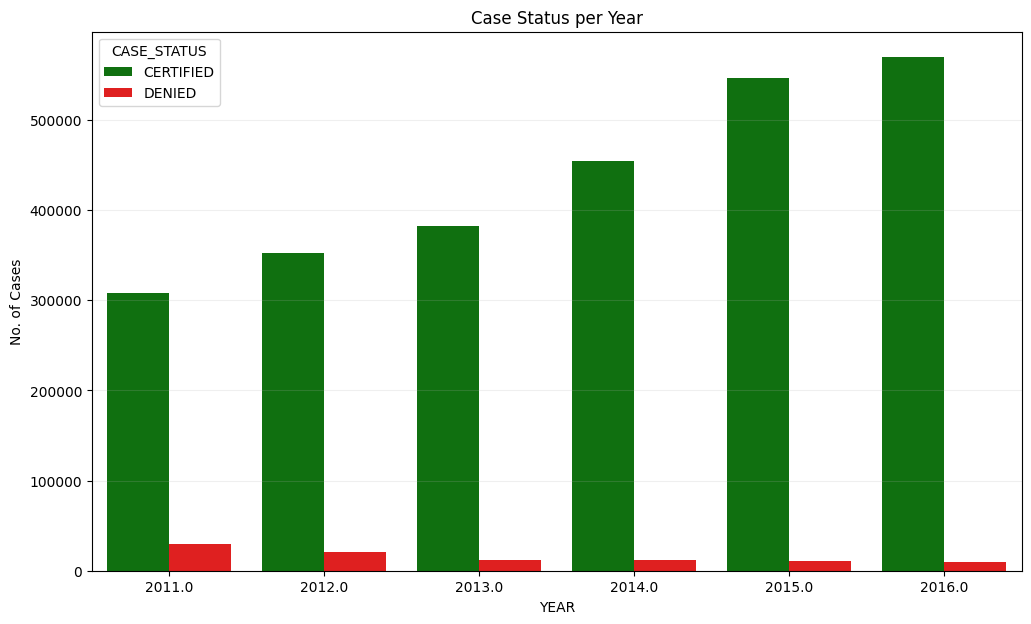

In [8]:
case_status_year=h1b_df[h1b_df["CASE_STATUS"].isin(["CERTIFIED","DENIED"])].groupby(["YEAR","CASE_STATUS"]).count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(12,7))
col=["green","red"]
sns.barplot(x=case_status_year["YEAR"],y=case_status_year["EMPLOYER_NAME"],hue=case_status_year["CASE_STATUS"],data=case_status_year,palette=col)
plt.grid(axis="y",alpha=0.2)
sns.set_style("whitegrid")
plt.ylabel("No. of Cases")
plt.title("Case Status per Year")
plt.show()

### No.of Full Time & Part Time roles offered from 2011 to 2016

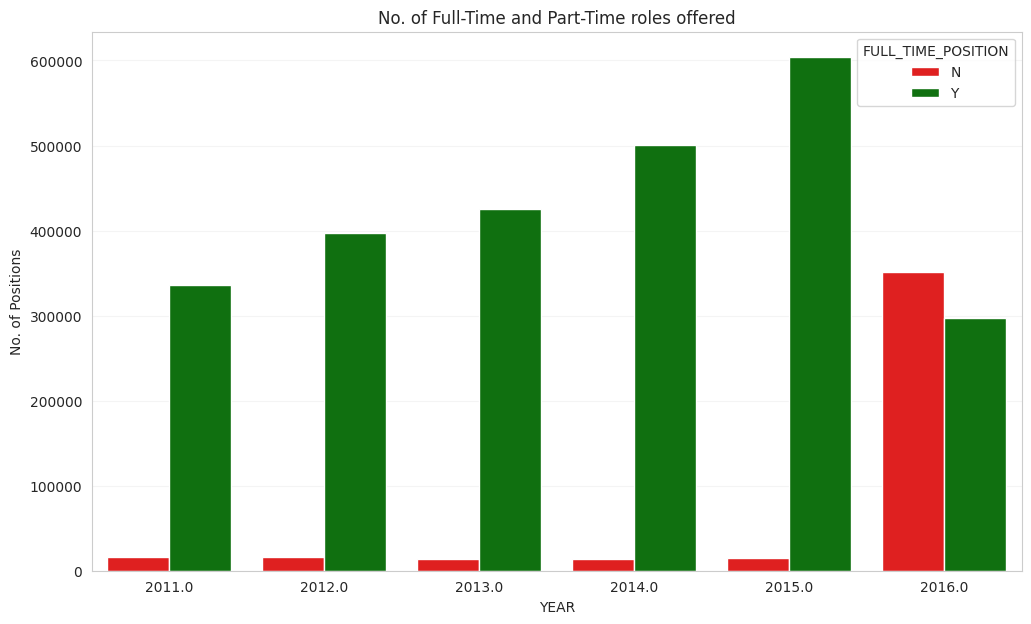

In [9]:
full_time_year=h1b_df.groupby(["YEAR","FULL_TIME_POSITION"])["SOC_NAME"].count().reset_index()
plt.figure(figsize=(12,7))
plt.grid(alpha=0.2)
sns.set_style("whitegrid")
sns.barplot(x=full_time_year["YEAR"],y=full_time_year["SOC_NAME"],hue=full_time_year["FULL_TIME_POSITION"],palette=["red","green"])
plt.ylabel("No. of Positions")
plt.title("No. of Full-Time and Part-Time roles offered")
plt.show()

### Findings:
- Surprisingly More number of part time roles were applied for H1B sponsorship during 2016.

### Which Companies offered Part-Time roles in 2016

In [10]:
df1=h1b_df[h1b_df["YEAR"]==2016]
df1=df1[df1["FULL_TIME_POSITION"]=="N"]
companies=df1.groupby("EMPLOYER_NAME").count()["SOC_NAME"].reset_index()
companies=companies.sort_values(by="SOC_NAME",ascending=False)
companies=companies[["EMPLOYER_NAME","SOC_NAME"]]
companies=companies.set_index("EMPLOYER_NAME")
companies.columns=["No. of Part_Time roles offered"]
companies[:20]

,No. of Part_Time roles offered
EMPLOYER_NAME,
INFOSYS LIMITED,12754
TCS,10800
IBM LIMITED,5759
WIPRO LIMITED,5370
CAPGEMINI AMERICA INC,4518
ACCENTURE LLP,3665
"TECH MAHINDRA (AMERICAS),INC.",3169
DELOITTE,3010
COGNIZANT SOLUTIONS,2646


# Major H1B Offering Comapnies

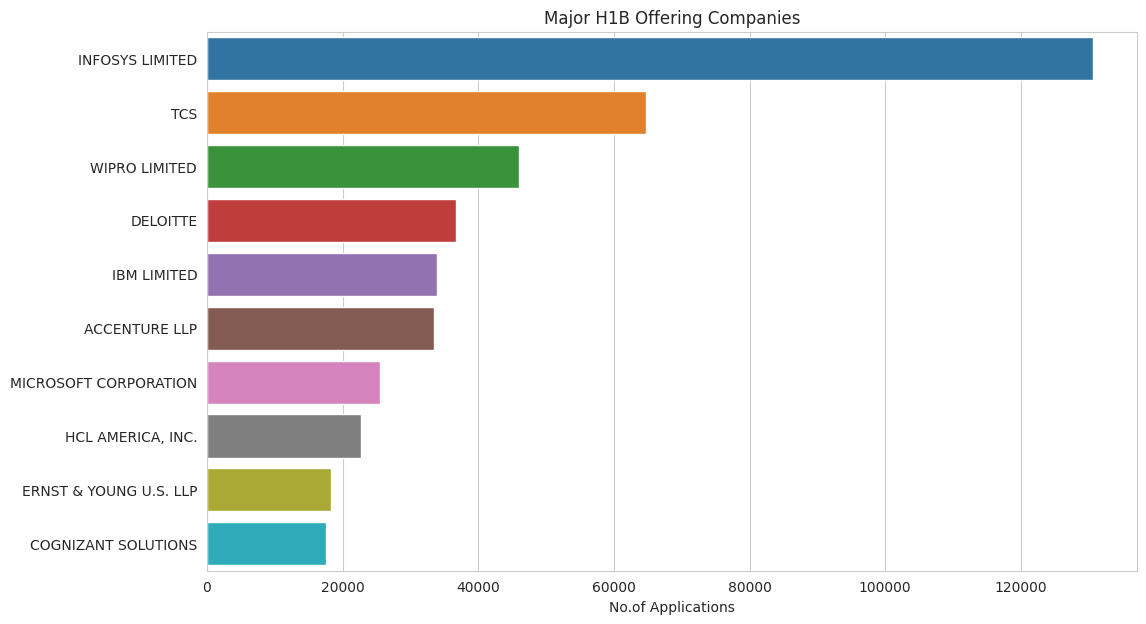

In [11]:
companies_offering=h1b_df.groupby("EMPLOYER_NAME").count()["SOC_NAME"].reset_index()
companies_offering=companies_offering.sort_values(by="SOC_NAME",ascending=False)
companies_offering=companies_offering[:10]
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.barplot(x=companies_offering["SOC_NAME"],y=companies_offering["EMPLOYER_NAME"],data=companies_offering)
plt.xlabel("No.of Applications")
plt.ylabel("")
plt.title("Major H1B Offering Companies")
plt.show()

### Findings:
- No Surprise that the top 3 companies offering H1B sponsorship are INFOSYS, TCS & WIPRO.
- Some of the major consulting companies in India are the major applicants in H1B lottery.
- Key reason behind are cheap labor, plethora of resources.

### No of Applications made by Top 5 Companies over Years

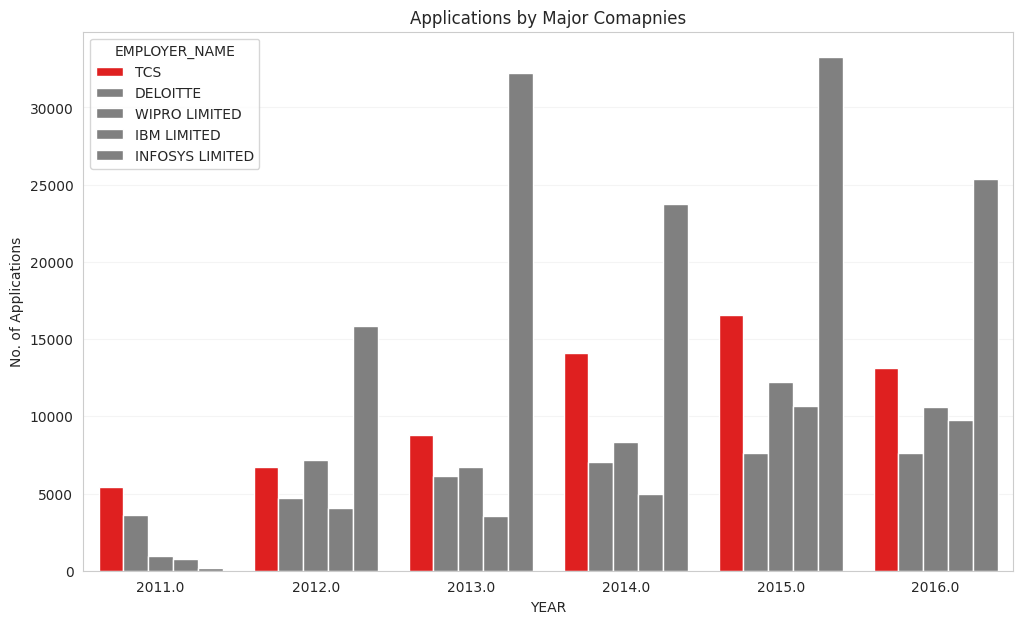

In [12]:
top_companies=h1b_df.groupby(["YEAR","EMPLOYER_NAME"])["SOC_NAME"].count().reset_index()
top_companies=top_companies.sort_values(by=["YEAR","SOC_NAME"],ascending=[True,False])
top_companies=top_companies[top_companies["EMPLOYER_NAME"].isin(["TCS","INFOSYS LIMITED","WIPRO LIMITED","DELOITTE","IBM LIMITED"])]
plt.figure(figsize=(12,7))
plt.grid(axis="y",alpha=0.2)
sns.barplot(x=top_companies["YEAR"],y=top_companies["SOC_NAME"],hue=top_companies["EMPLOYER_NAME"],palette=["red","grey","grey","grey","grey"])
plt.title("Applications by Major Comapnies")
plt.ylabel("No. of Applications")
plt.show()

### Findings:
- During 2011, Infosys has the lowest number of H1B applications.
- Fast forward to 2016, Infosys has become the biggest company in terms of applications.

# Major Roles

# What types of roles are being sponsored by the top companies?

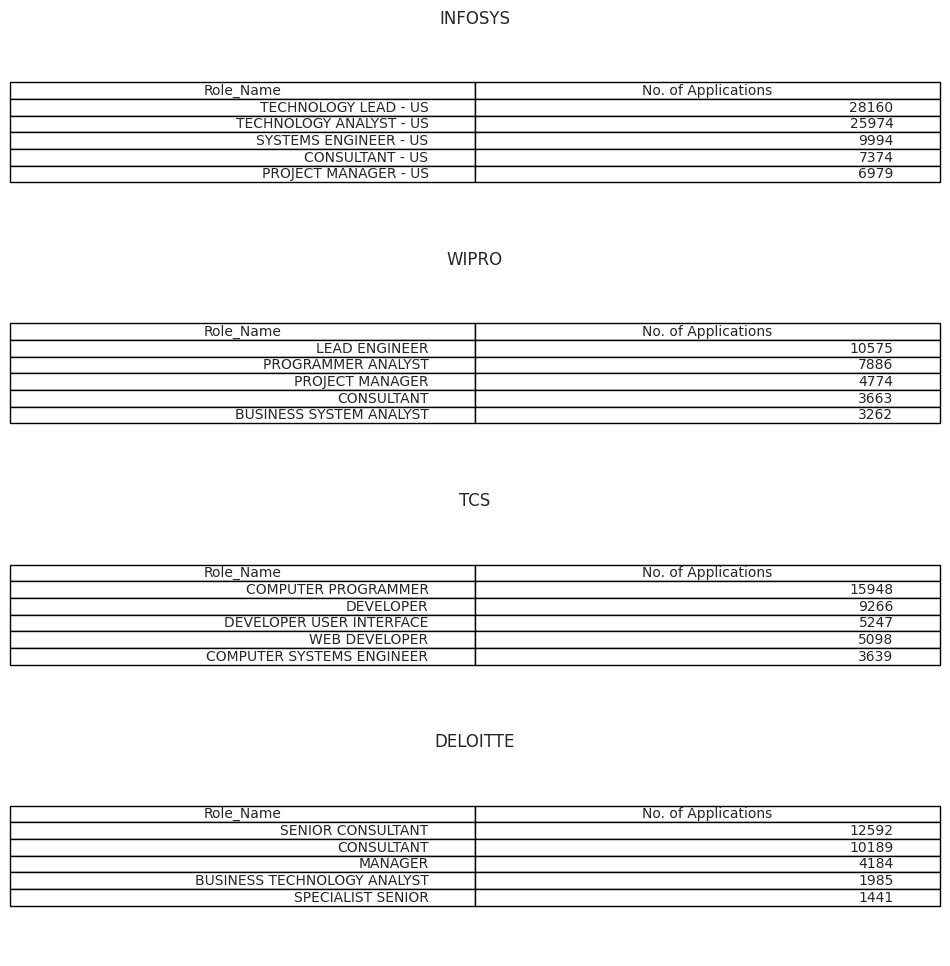

In [13]:
DELOITTE=h1b_df[h1b_df["EMPLOYER_NAME"]=="DELOITTE"]
DELOITTE=DELOITTE.groupby("JOB_TITLE").count()["EMPLOYER_NAME"].reset_index()
DELOITTE=DELOITTE.sort_values(by="EMPLOYER_NAME",ascending=False)[:5]

WIPRO=h1b_df[h1b_df["EMPLOYER_NAME"]=="WIPRO LIMITED"]
WIPRO=WIPRO.groupby("JOB_TITLE").count()["EMPLOYER_NAME"].reset_index()
WIPRO=WIPRO.sort_values(by="EMPLOYER_NAME",ascending=False)[:5]

TCS=h1b_df[h1b_df["EMPLOYER_NAME"]=="TCS"]
TCS=TCS.groupby("JOB_TITLE").count()["EMPLOYER_NAME"].reset_index()
TCS=TCS.sort_values(by="EMPLOYER_NAME",ascending=False)[:5]

INFOSYS=h1b_df[h1b_df["EMPLOYER_NAME"]=="INFOSYS LIMITED"]
INFOSYS=INFOSYS.groupby("JOB_TITLE").count()["EMPLOYER_NAME"].reset_index()
INFOSYS=INFOSYS.sort_values(by="EMPLOYER_NAME",ascending=False)[:5]

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(411)
ax1.table(cellText=INFOSYS.values,loc="center",
         colLabels=["Role_Name","No. of Applications"])
ax1.set_title("INFOSYS")
ax1.axis("off")

ax2=fig.add_subplot(412)
ax2.table(cellText=WIPRO.values,loc="center",colLabels=["Role_Name","No. of Applications"])
ax2.set_title("WIPRO")
ax2.axis("off");

ax3=fig.add_subplot(413)
ax3.table(cellText=TCS.values,colLabels=["Role_Name","No. of Applications"],loc="center")
ax3.set_title("TCS")
ax3.axis("off");

ax4=fig.add_subplot(414)
ax4.table(cellText=DELOITTE.values,colLabels=["Role_Name","No. of Applications"],loc="center")
ax4.set_title("DELOITTE")
ax4.axis("off");

### Findings:
- If you are employed in any of the roles in the respective companies, Then you have good chances of being offered H1B sponsorship to undertake job in United States.
- Infosys is offering H1B majorly to lead consultants, Whereas TCS is offering much of the H1B's to the developers.
- Most of the companies are offering H1B to majority of the key software roles.

### Roles with highest no. of applications from 2011 to 2016

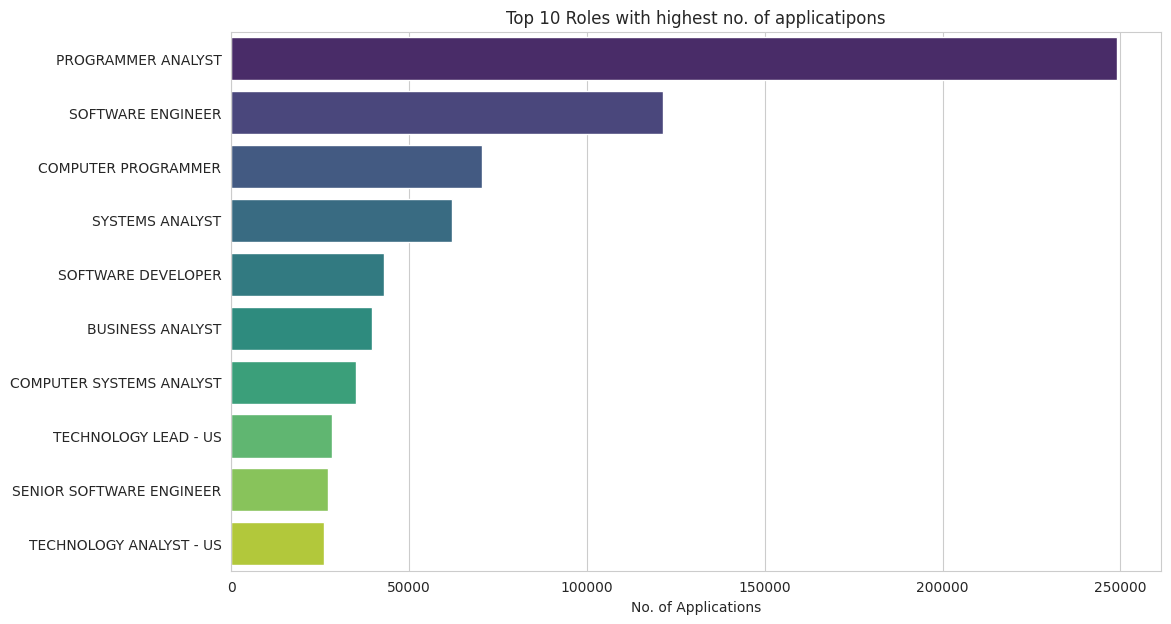

In [14]:
roles=h1b_df.groupby("JOB_TITLE").count()["EMPLOYER_NAME"].reset_index()
roles=roles.sort_values(by="EMPLOYER_NAME",ascending=False)[:10]
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.barplot(x=roles["EMPLOYER_NAME"],y=roles["JOB_TITLE"],data=roles,palette='viridis')
plt.ylabel("")
plt.xlabel("No. of Applications")
plt.title("Top 10 Roles with highest no. of applicatipons")
plt.show()

### Findings:
- Programmar Analyst has the highest number of H1B applications followed by Software Engineer and Computer Programmer.

# Salary Distribution for Top Roles

### Programmer Analyst

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


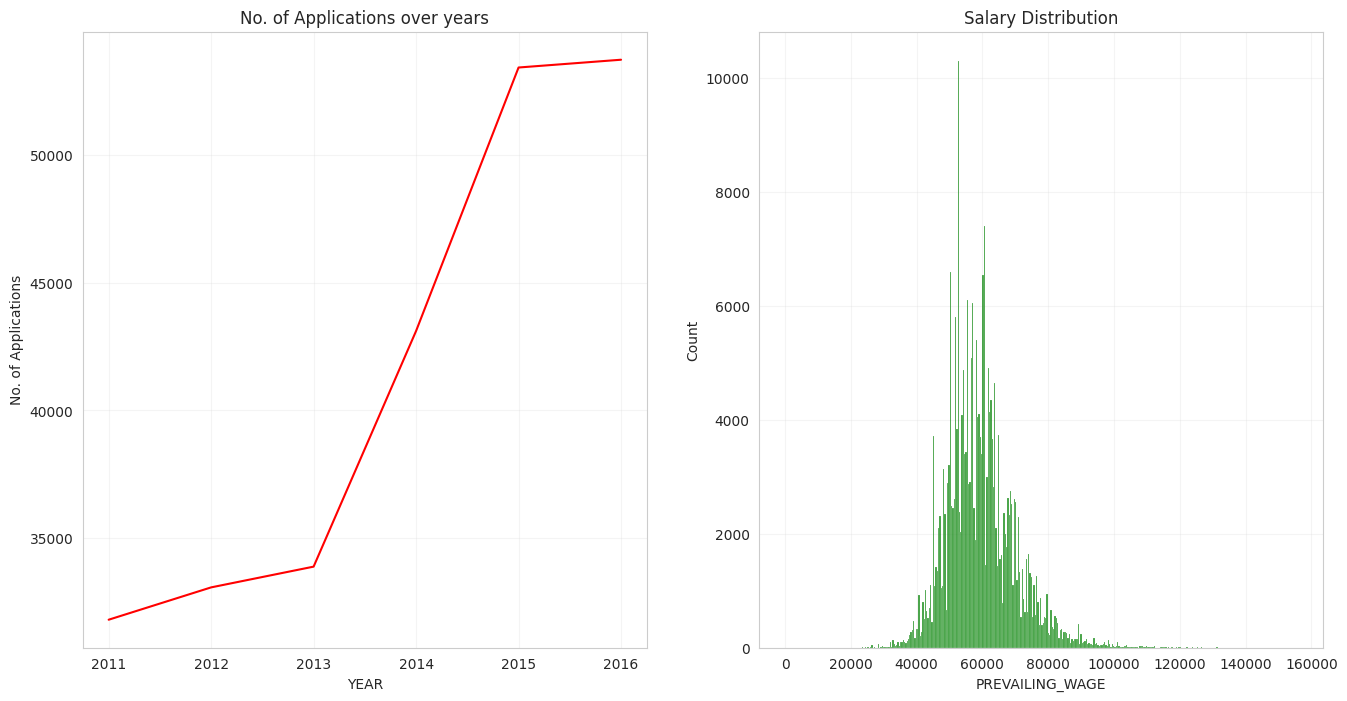

In [15]:
programmer_analyst=h1b_df[h1b_df["JOB_TITLE"]=="PROGRAMMER ANALYST"]
programmer_analyst_app=programmer_analyst.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.lineplot(x=programmer_analyst_app["YEAR"],y=programmer_analyst_app["EMPLOYER_NAME"],data=programmer_analyst_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.grid(alpha=0.2)
plt.plot();
programmer_analyst_salary=h1b_df[(h1b_df["JOB_TITLE"]=="PROGRAMMER ANALYST") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
sns.histplot(x=programmer_analyst_salary["PREVAILING_WAGE"],data=programmer_analyst_salary,color="green")
plt.title("Salary Distribution")
plt.grid(alpha=0.2)
plt.plot();

### Software Engineer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


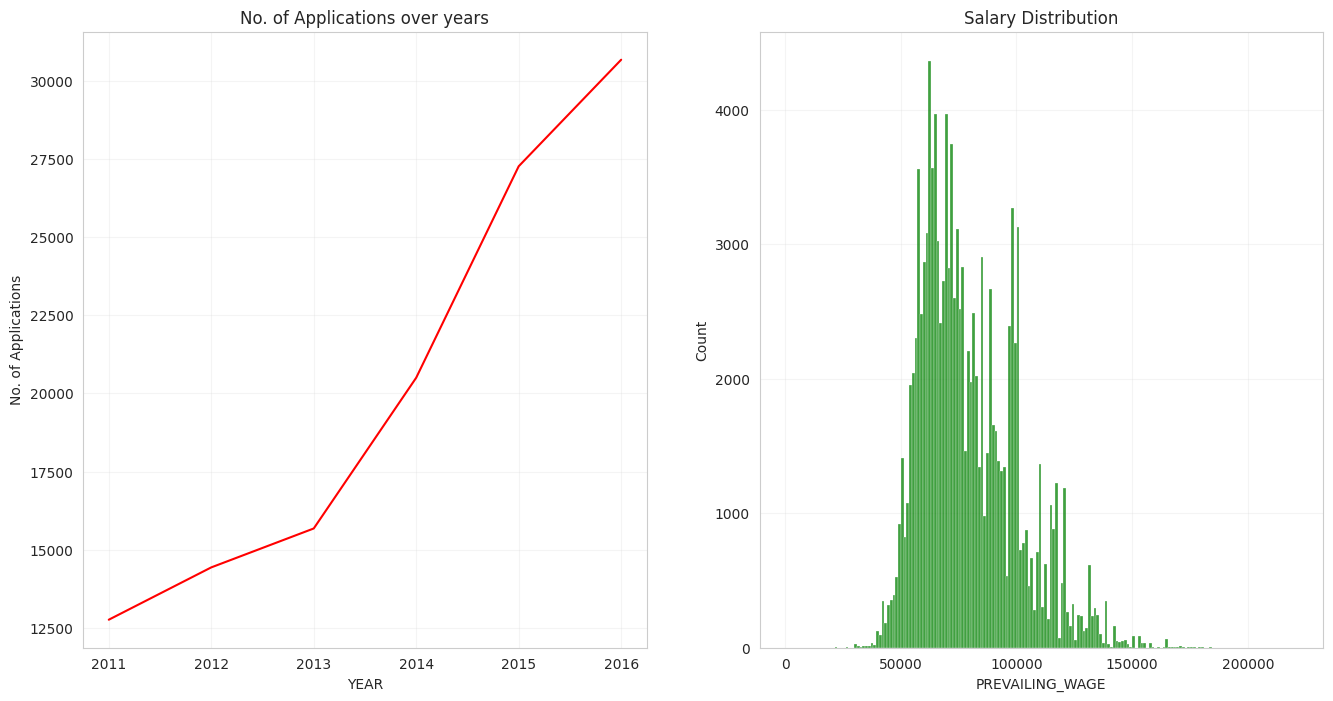

In [16]:
software_engineer=h1b_df[h1b_df["JOB_TITLE"]=="SOFTWARE ENGINEER"]
software_engineer_app=software_engineer.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.lineplot(x=software_engineer_app["YEAR"],y=software_engineer_app["EMPLOYER_NAME"],data=software_engineer_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.grid(alpha=0.2)
plt.plot();
software_engineer_salary=h1b_df[(h1b_df["JOB_TITLE"]=="SOFTWARE ENGINEER") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
sns.histplot(x=software_engineer_salary["PREVAILING_WAGE"],data=software_engineer_salary,color="green")
plt.title("Salary Distribution")
plt.grid(alpha=0.2)
plt.plot();

### Computer Programmer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


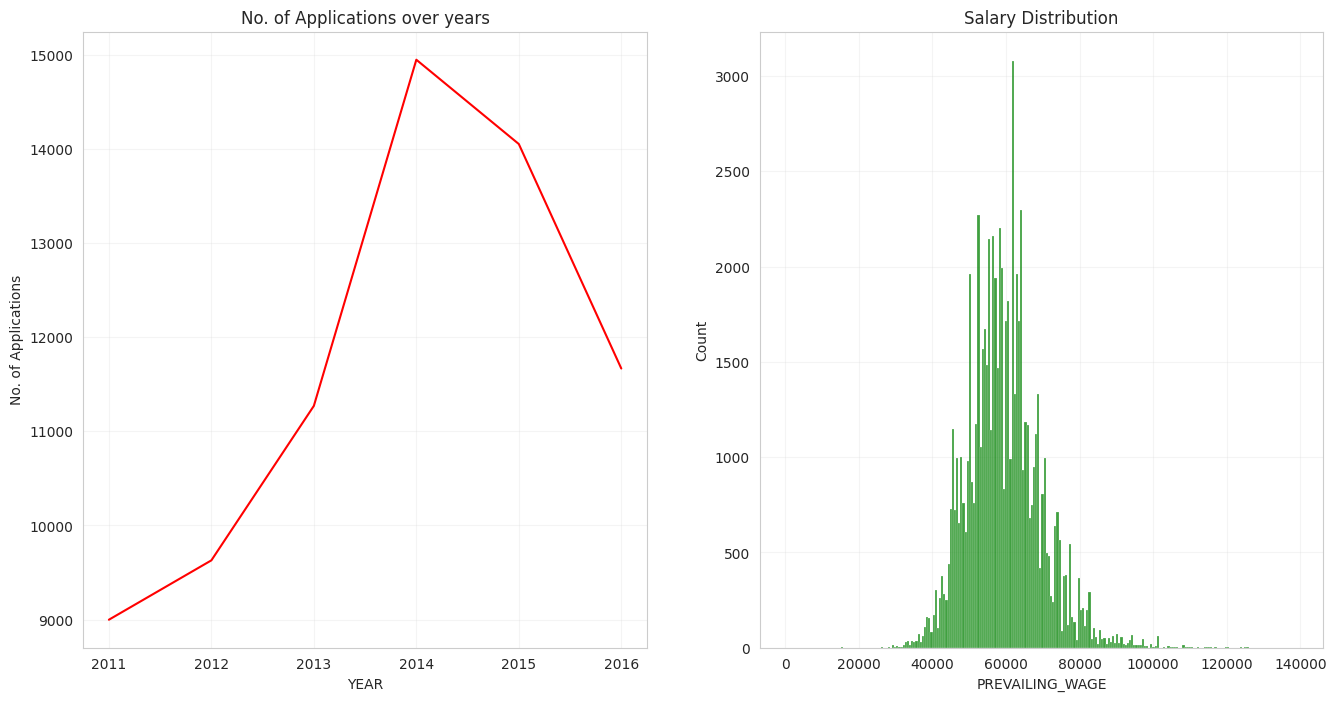

In [17]:
computer_programmer=h1b_df[h1b_df["JOB_TITLE"]=="COMPUTER PROGRAMMER"]
computer_programmer_app=computer_programmer.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=computer_programmer_app["YEAR"],y=computer_programmer_app["EMPLOYER_NAME"],data=computer_programmer_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
computer_programmer_salary=h1b_df[(h1b_df["JOB_TITLE"]=="COMPUTER PROGRAMMER") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=computer_programmer_salary["PREVAILING_WAGE"],data=computer_programmer_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

### System Analyst

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


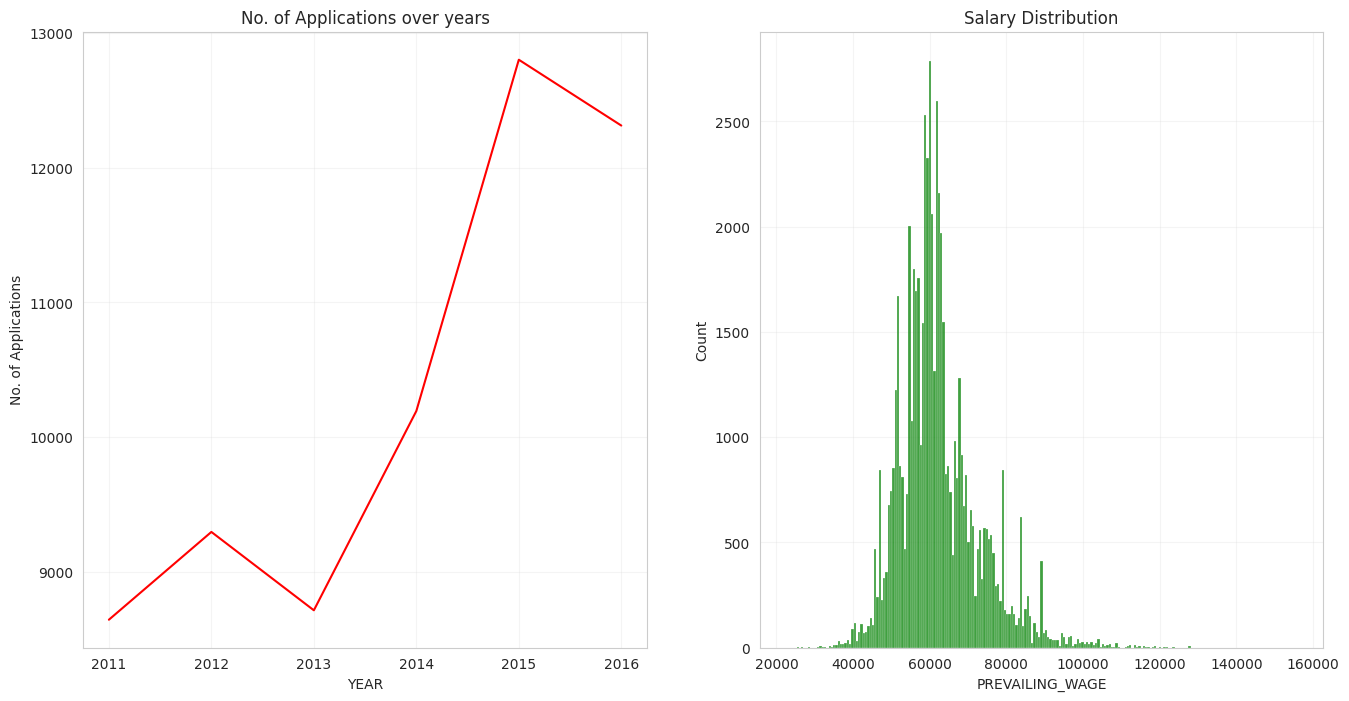

In [18]:
system_analyst=h1b_df[h1b_df["JOB_TITLE"]=="SYSTEMS ANALYST"]
system_analyst_app=system_analyst.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=system_analyst_app["YEAR"],y=system_analyst_app["EMPLOYER_NAME"],data=system_analyst_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
system_analyst_salary=h1b_df[(h1b_df["JOB_TITLE"]=="SYSTEMS ANALYST") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=system_analyst_salary["PREVAILING_WAGE"],data=system_analyst_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

### Software Developer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


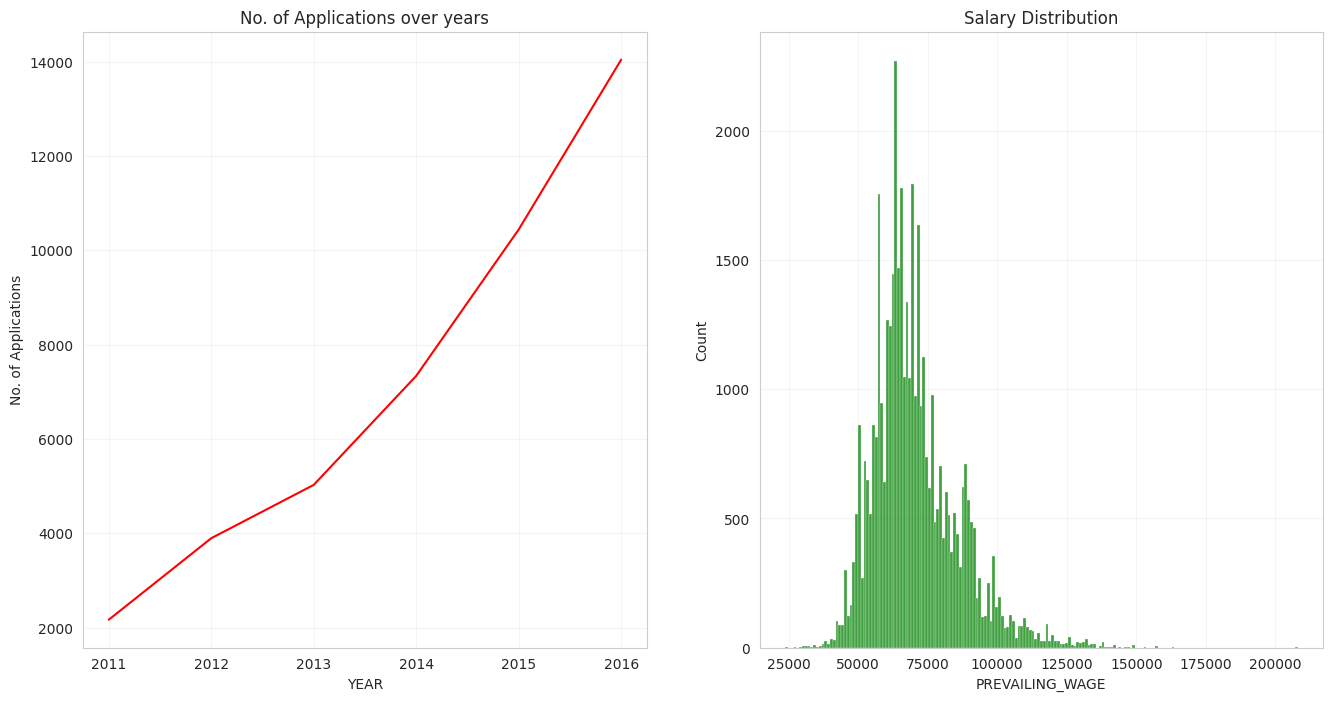

In [19]:
software_developer=h1b_df[h1b_df["JOB_TITLE"]=="SOFTWARE DEVELOPER"]
software_developer_app=software_developer.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=software_developer_app["YEAR"],y=software_developer_app["EMPLOYER_NAME"],data=software_developer_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
software_developer_salary=h1b_df[(h1b_df["JOB_TITLE"]=="SOFTWARE DEVELOPER") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=software_developer_salary["PREVAILING_WAGE"],data=software_developer_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

# How the Data related roles look like

### Data Scientist

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


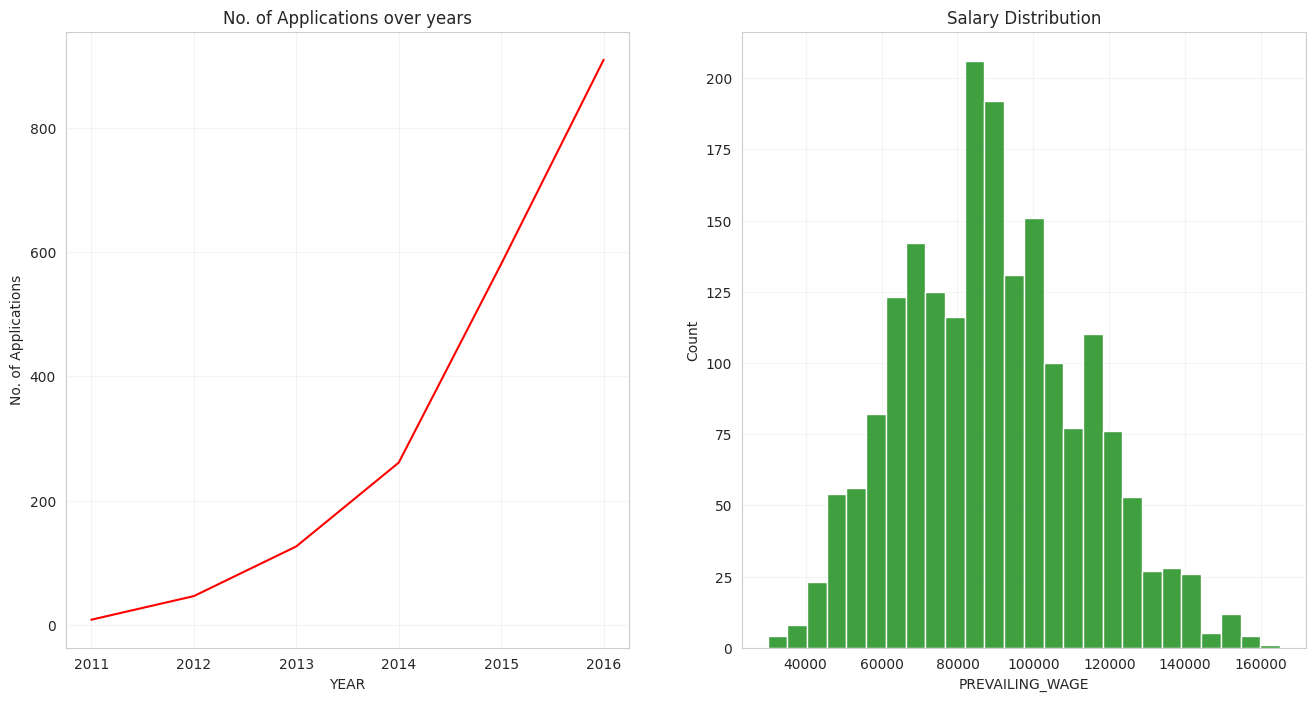

In [20]:
data_scientist=h1b_df[h1b_df["JOB_TITLE"]=="DATA SCIENTIST"]
data_scientist_app=data_scientist.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=data_scientist_app["YEAR"],y=data_scientist_app["EMPLOYER_NAME"],data=data_scientist_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
data_scientist_salary=h1b_df[(h1b_df["JOB_TITLE"]=="DATA SCIENTIST") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=data_scientist_salary["PREVAILING_WAGE"],data=data_scientist_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

### Data Engineer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


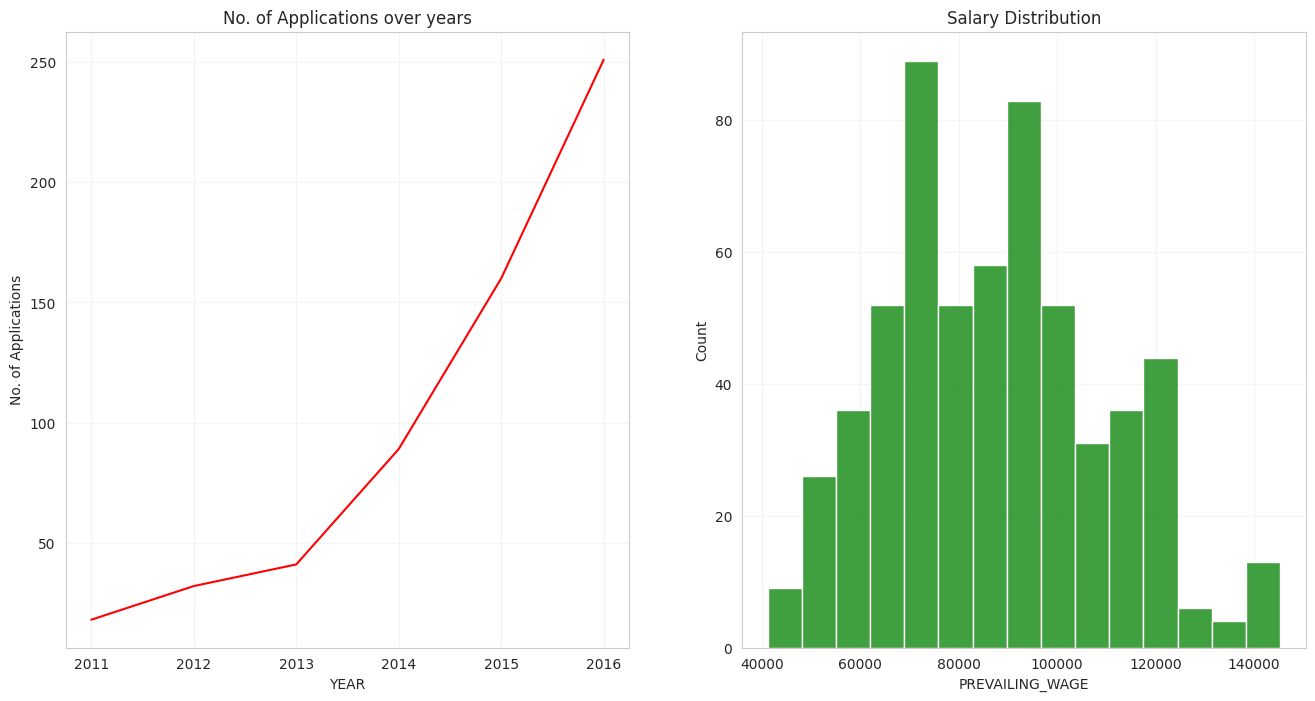

In [21]:
data_engineer=h1b_df[h1b_df["JOB_TITLE"]=="DATA ENGINEER"]
data_engineer_app=data_engineer.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=data_engineer_app["YEAR"],y=data_engineer_app["EMPLOYER_NAME"],data=data_engineer_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
data_engineer_salary=h1b_df[(h1b_df["JOB_TITLE"]=="DATA ENGINEER") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=data_engineer_salary["PREVAILING_WAGE"],data=data_engineer_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

### Data Analyst

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


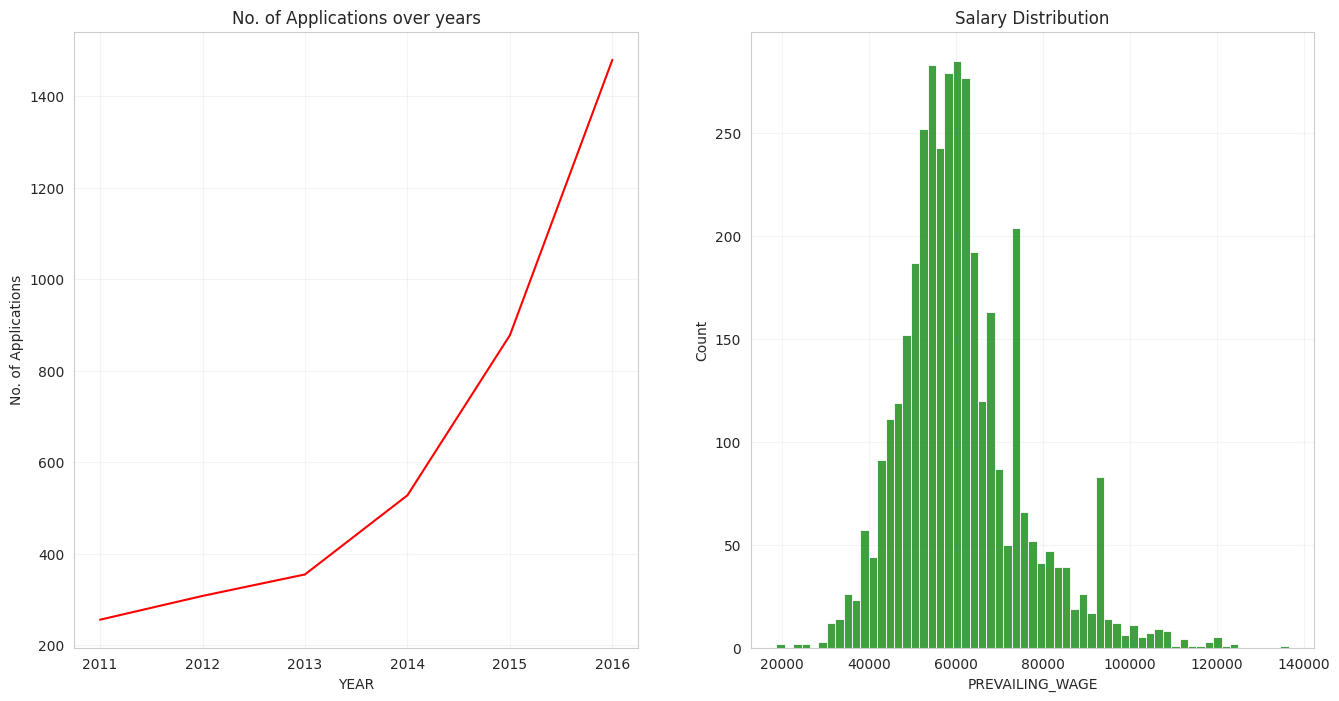

In [22]:
data_analyst=h1b_df[h1b_df["JOB_TITLE"]=="DATA ANALYST"]
data_analyst_app=data_analyst.groupby("YEAR").count()["EMPLOYER_NAME"].reset_index()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid(alpha=0.2)
sns.lineplot(x=data_analyst_app["YEAR"],y=data_analyst_app["EMPLOYER_NAME"],data=data_analyst_app,color="red")
plt.ylabel("No. of Applications")
plt.title("No. of Applications over years")
plt.plot();
data_analyst_salary=h1b_df[(h1b_df["JOB_TITLE"]=="DATA ANALYST") & (h1b_df["PREVAILING_WAGE"]<300000)]
plt.subplot(1,2,2)
plt.grid(alpha=0.2)
sns.histplot(x=data_analyst_salary["PREVAILING_WAGE"],data=data_analyst_salary,color="green")
plt.title("Salary Distribution")
plt.plot();

### Findings:
- Red line signifies the no of applications and green signifies the no of applications got certified.
- Data roles are the most dominant roles in the 21st Century.
- Less skilled people and high wages are clearly evident from the above graphs.
- Getting a H1B is highly likely if you have a offer with Data Roles.

###  Companies offering H1B for Data related roles

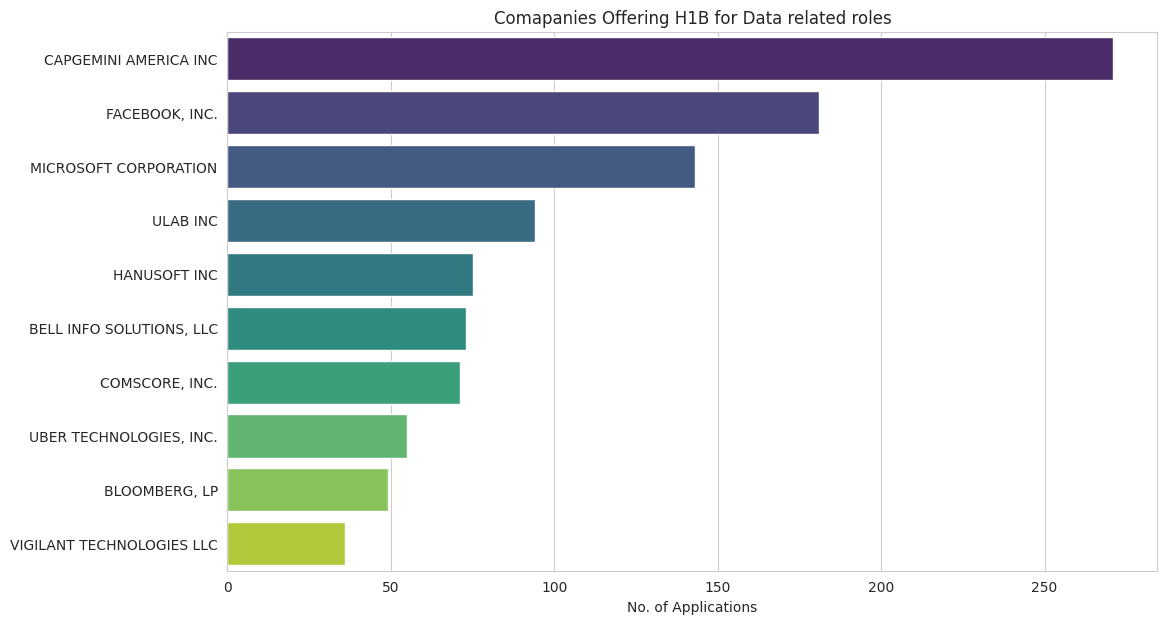

In [23]:
datas=h1b_df[h1b_df["JOB_TITLE"].isin(["DATA SCIENTIST","DATA ENGINEER","DATA ANALYST"])]
datas=datas.groupby("EMPLOYER_NAME").count()["SOC_NAME"].reset_index()
datas=datas.sort_values(by="SOC_NAME",ascending=False)[:10]
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.barplot(x=datas["SOC_NAME"],y=datas["EMPLOYER_NAME"],data=datas,palette='viridis')
plt.title("Comapanies Offering H1B for Data related roles")
plt.xlabel("No. of Applications")
plt.ylabel("")
plt.show()

# Conclusions

- No of applications are growing rapidly so a the no of applications being approved.
- Infosys, TCS, Wipro offers the highest no of H1B applications as compared to other companies.
- Some of the key roles attracting H1B are related to software developer, Analyst, Testing.
- Even though the number of applications are higher for software related roles, The Data related roles seems to be yielding great returns.
- Data related roles has very low rejection rate and high paying salaries.

# Thank You